<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Segunda%20Parte/PCA%26Clustering/Clase%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. finalizamos la práctica 6 con el agrupamiento jerárquico

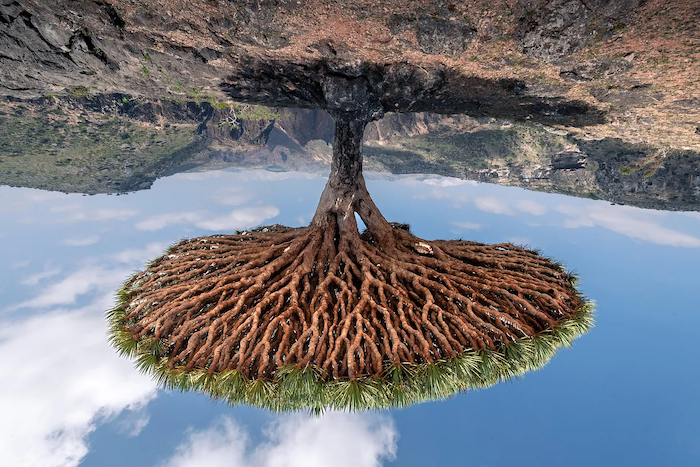

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Clustering jerárquico

El agrupamiento jerárquico es un método de agrupamiento como kmeans y DBSCAN pero a la vez el método se encarga de construir jerarquías entre los grupos (clusters).

Así, mas allá de dar grupos de observaciones, el método da relaciones entre los distintos grupos.


El ```linkage``` es la forma en la que vamos a medir la "distancia" entre los clusters. Hay varios linkage para agrupar.

* single linkage: define la distancia entre dos clusters como la distancia mínima entre los puntos de los dos clusters (esta distancia entre puntos puede ser la distancia euclídea entre otras)

* complete linkage: define la distancia entre dos clusters como la distancia máxima entre los puntos de los dos clusters (esta distancia entre puntos puede ser la distancia euclídea entre otras)

* The average linkage: define la distancia entre dos clustes como  el promedio de las distancias entre todos los pares de puntos en los dos clusters


* Ward linkage: es un linkage de minima varianza que no vamos a definir acá.



### visulaización gráfica:

#### Dendrograma

Para visulaizar la relación entre dos clusters usamos el dendrograma.

El dendrograma es un gráfico tipo árbol que sirve para  representar la estructura jerárquica de los datos. Consiste de hojar y ramas (como un árbol!).

Así, las hojas representan los puntos (datos) y las ramas representan los clusters.

De las ramas podemos ver la relación entre los data points y cuan similares son entre ellos de acuerdo a sus caracterísiticas.


## Ejmplo:



Como ejemplo,, vamos a considerar el conjunto de datos *US_Arrests.csv* que contiene información estadística de la cantidad de arrestos (cada 100 mil habitantes) para cada uno de los siguientes crímenes **Murder**, **Assault** y **Rape**  de 50 estados de EE.UU. Además hay una columna **UrbanPop** que representa el porcentaje de la población que vive en áreas urbanas.



Un ejemplo de como interpretar los datos es: para el estado de Alabama se tienen: 13.2 arrestos cada 100 mil habitantes por
asesinatos , 236 ataques (que no resultan en muerte) cada 100 mil habitantes y 21. 2 arrestos cada 100 mil hab por violación.

Vamos a descartar la variable *UrbanPop* de los datos.

El objetivo es agrupar los estados de acuerdo a los que tengan mas

In [ ]:
data = pd.read_csv("US_Arrests.csv")   # lee el archivo y lo guarda como un dataframe

data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


notar que hay una "columna" donde estan los nombres de cada estado, esta no es en si una columna sino el nombre de cada fila y se llama el index del dataframe

In [ ]:
data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

Eliminamos la columna "UrbanPop" usando el metodo ```drop``` de pandas aplicado al dataframe data

In [ ]:
data = data.drop(labels = "UrbanPop", axis = 1)

data.head(10)

,Murder,Assault,Rape
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7
Connecticut,3.3,110,11.1
Delaware,5.9,238,15.8
Florida,15.4,335,31.9
Georgia,17.4,211,25.8


In [ ]:
print(data.shape)

print(data.columns)

(50, 3)
Index(['Murder', 'Assault', 'Rape'], dtype='object')


Para hacer el clustering jerárquico vamos a usar la función ```AgglomerativeClustering``` de la  librería ```sklearn.cluster```.

También lo vamos a hacer usando la librería ```scipy.cluster.hierarchy```. LA ventaja de usar esta librería es que tenemos acceso al **dendrogram** (el arbol de clustering).

Ambas librerías, si bien aplican el mismo algoritmo, funcionan distinto!


In [ ]:
from sklearn.cluster import AgglomerativeClustering # importamos la clases AgglomerativeClustering


Cuando inicializamos el objeto AgglomerativeClustering() o bien le indicamos el valor del input

n_clusters = cantidad de clusters

o bien le indicamos el valor del input

distance_threshold = la distancia (en el sentido del linkage) por arriba de la cual no se unen dos clusters

In [ ]:
# generemos un objeto de  AgglomerativeClustering, le indicamos 4 clusters:

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage = "single")

datos_ajustados = agg_clustering.fit(data)   #ajustamos los datos de data

# las etiquetas son:

etiquetas = datos_ajustados.labels_

print("Las clases son:", etiquetas)

Las clases son: [2 2 2 0 2 0 1 2 3 0 1 1 2 1 1 1 1 2 1 2 0 2 1 2 0 1 1 2 1 0 2 2 3 1 1 0 0
 1 0 2 1 0 0 1 1 0 0 1 1 0]


Como leemos la lista etiquetas:

etiquetas[0] = 2  significa que al estado de Alabama lo asigno al grupo 2

etiquetas[3] = 0 sinifica que al estado de Arkansas lo asignó al grupo 0 y asi sucesivamente.



Probemos indicandole el input_threshold en lugar de n_clusters:

In [ ]:
# generemos un objeto de  AgglomerativeClustering, le indicamos el distance threshold:


#este valor de threshold lo pude determinar mirando el dendrogram que con sklear nolo tenemos disponible

agg_clustering1 = AgglomerativeClustering(distance_threshold= 25, n_clusters=None, linkage="single")

datos_ajustados1 = agg_clustering1.fit(data)   #ajustamos los datos de data

# las etiquetas son:

etiquetas1 = datos_ajustados1.labels_

print("Las clases son:", etiquetas1)

Las clases son: [2 2 2 0 2 0 1 2 3 0 1 1 2 1 1 1 1 2 1 2 0 2 1 2 0 1 1 2 1 0 2 2 3 1 1 0 0
 1 0 2 1 0 0 1 1 0 0 1 1 0]


In [ ]:
etiquetas - etiquetas1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Podemos añadir al dataframe data una columna que indique a cada estado la etiqueta asignada. Esto se hace, declarando el nombre de la nueva columna que agregamos y la info que vamos a poner en dicha columna:

In [ ]:
data_etiquetada = data.copy()

data_etiquetada["etiqueta"] = etiquetas

In [ ]:
data_etiquetada.head(10)

,Murder,Assault,Rape,etiqueta
Alabama,13.2,236,21.2,2
Alaska,10.0,263,44.5,2
Arizona,8.1,294,31.0,2
Arkansas,8.8,190,19.5,0
California,9.0,276,40.6,2
Colorado,7.9,204,38.7,0
Connecticut,3.3,110,11.1,1
Delaware,5.9,238,15.8,2
Florida,15.4,335,31.9,3
Georgia,17.4,211,25.8,0


Podemos extraer información sobre estos datos a partir de las etiquetas para entender como agrupó:

Para esto podemos usar el método de  ```pandas```  *groupy* que agrupa las observaciones de acuerdo a cualquier columna, por ejemplo la etiqueta y le podemos calcular en promedio cuantos crimenes de distintos tipos hay por clusters

In [ ]:
data_etiquetada.groupby(['etiqueta']).mean()

,Murder,Assault,Rape
etiqueta,,,
0,8.214286,173.285714,22.842857
1,4.270000,87.550000,14.390000
2,11.471429,263.500000,29.000000
3,14.200000,336.000000,24.000000


Como leemos esto:

El promedio de arrestos entre los del cluster 0:

* por asesinato es 8.21
* por ataques  es 173.28
* por violación es 22.84

y asi..

Lo que vemos a partir de esto es que los estados que agrupó en el cluster 3 son los de mayor tasa arrestos, seguidos por los del cluster 2 y 0 en ese orden.


Si queremos ver los estados que contiene cada cluster, hacemos lo siguiente:

In [ ]:
for cluster in range(4) :  # hay clusters 0, 1,2,3
  print("En el cluster " + str(cluster) + " los estados son: \n")
  estados = data_etiquetada[data_etiquetada["etiqueta"] == cluster].index.tolist()
  print(estados)
  print("\n")


En el cluster 0 los estados son: 

['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


En el cluster 1 los estados son: 

['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


En el cluster 2 los estados son: 

['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'South Carolina']


En el cluster 3 los estados son: 

['Florida', 'North Carolina']




## Clustering jerárquico usando ```scipy```

Antes de generar el dendograma, calculamos la matriz de linkage de los datos usando la función de linkage especificada por el usuario.

Para esto, importamos de la libreria ```scipy.cluster.hierarchy``` la funcion linkage y en ella especificamos el método de estre los explicados en: [Section Clustering jerárquico](#scrollTo=B8t4xPQaBmBx&line=14&uniqifier=1)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(data, method='single')   # por defecto el metodo method = 'single' y la distancia es la euclidea. Z es una matriz de (N-1)x4 siempre!!!

Una vez calculada la matriz de linkage, creamos el dendrogram usando la función ```dendrogram``` de ```scipy.cluster.hierarchy``` . Esta función recibe distintos inputs:

* La matriz Z del linkage

* La orientacion del arbol ("top" "right" otros) por defecto 'top'

* show_leaf_counts un boolean (True of False) if True, nos da la cantidad de hojas en el arbol

* otros inputs que están seteados por defecto...





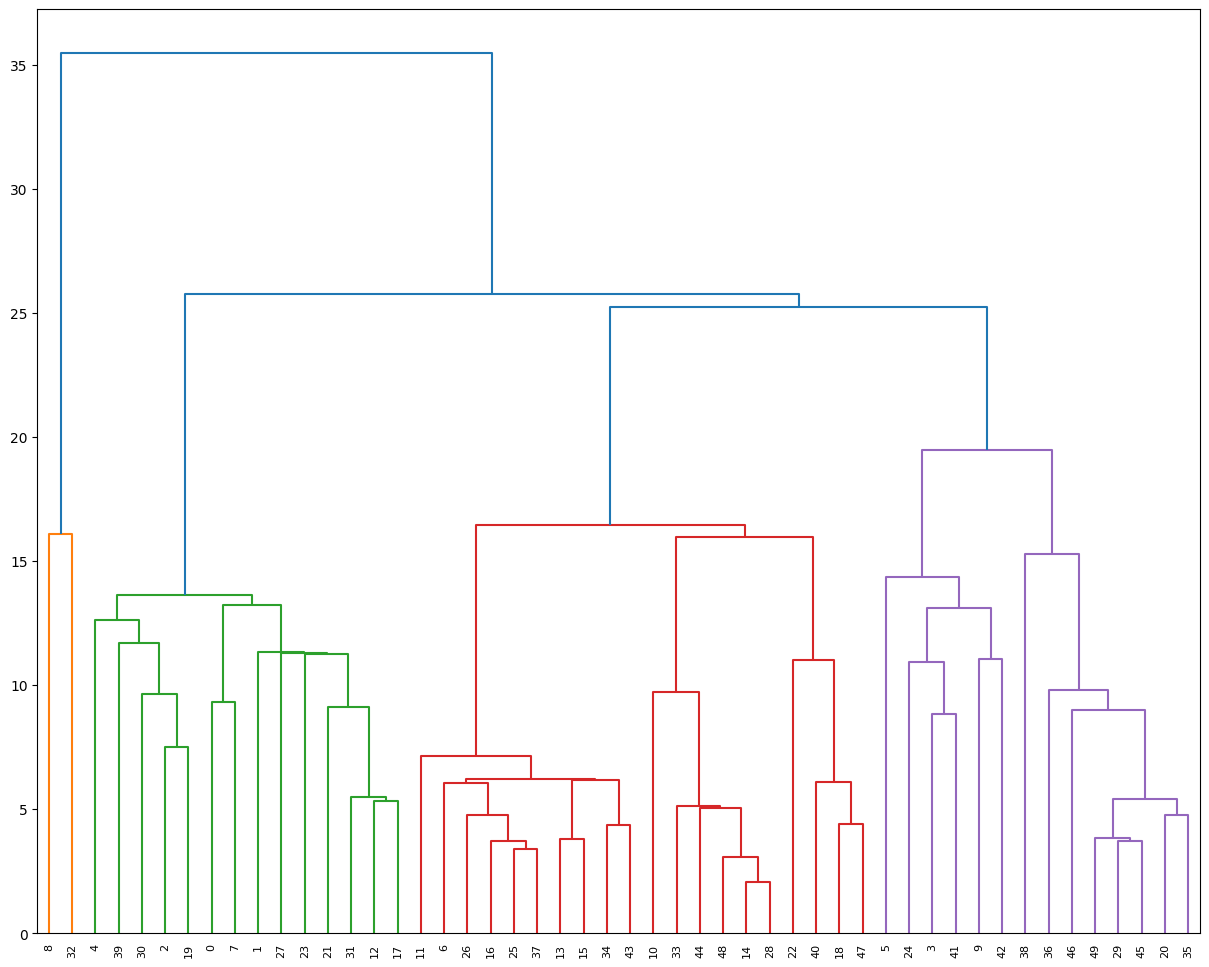

In [ ]:
plt.figure(figsize=(15, 12))

dendrogram(Z)

plt.show()

podemos pedir que en lugar de poner el indice de los estados agrupados, nos ponga el nombre de ellos,agregandole el input labels e indicandole que use la columna index del dataframe data

labels = data.index.tolist()  (el .tolist() es para que lo convierta en una lista)

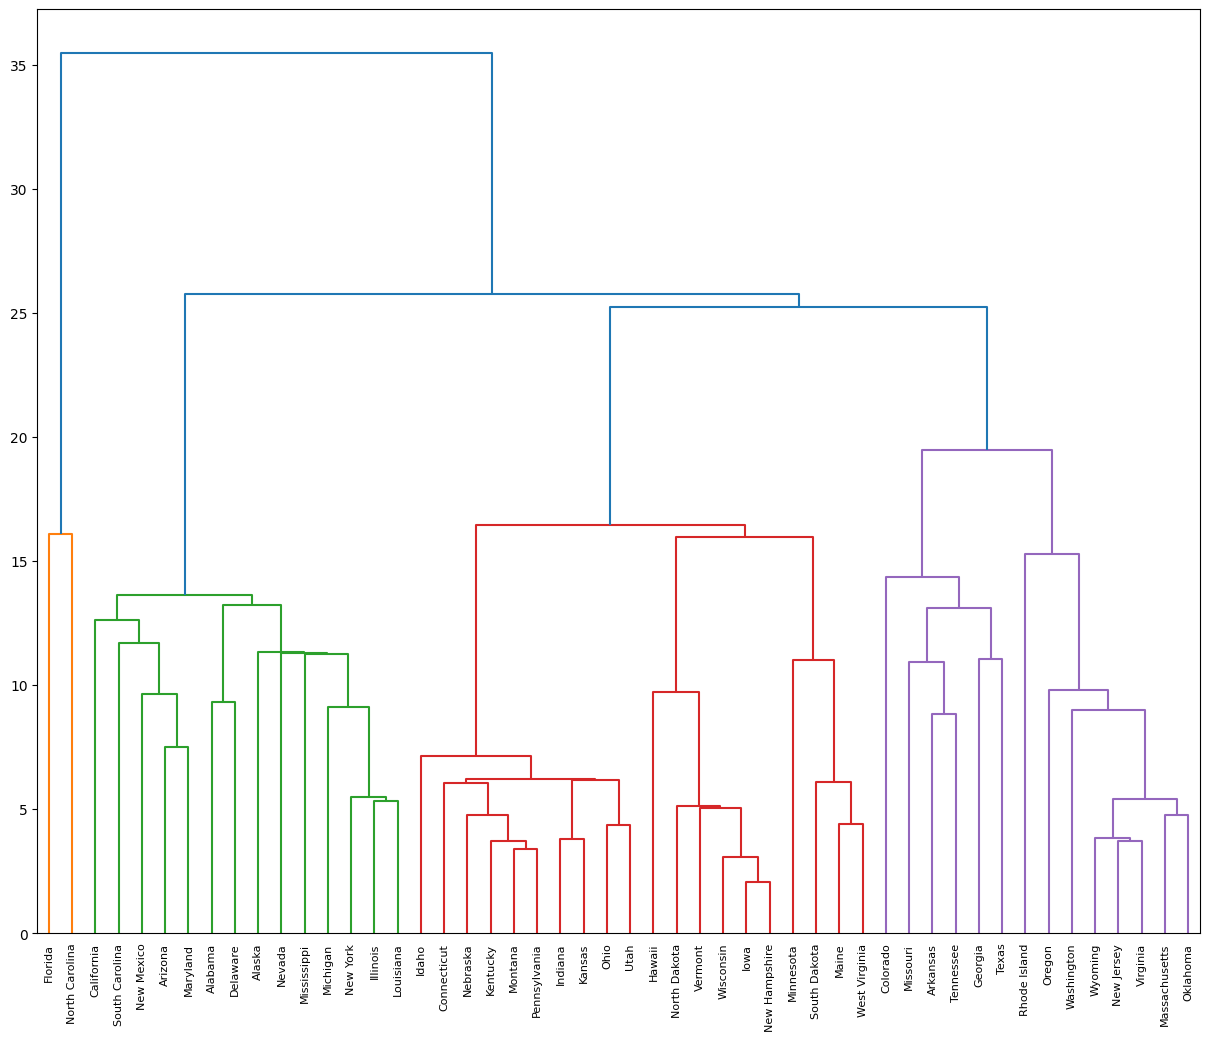

In [ ]:
plt.figure(figsize=(15, 12))

dendrogram(Z, orientation='top', labels=data.index.tolist(), show_leaf_counts = False)

plt.show()

Los clusters los determinamos poniendo como corte 20, de acuerdo a lo que vemos en el dendrograma

In [ ]:
corte = 25
clusters = fcluster(Z, t = corte, criterion = "distance")

In [ ]:
print(clusters)

[2 2 2 4 2 4 3 2 1 4 3 3 2 3 3 3 3 2 3 2 4 2 3 2 4 3 3 2 3 4 2 2 1 3 3 4 4
 3 4 2 3 4 4 3 3 4 4 3 3 4]


Agreguemos al dataframe data una columna con las etiquetas obtenidas con fcluster

In [ ]:
data_con_clusters = data.copy()  #le pongo este nombre para distinguirlo del otro data frame

data_con_clusters["cluster"] = clusters

data_con_clusters.head(10)

,Murder,Assault,Rape,cluster
Alabama,13.2,236,21.2,2
Alaska,10.0,263,44.5,2
Arizona,8.1,294,31.0,2
Arkansas,8.8,190,19.5,4
California,9.0,276,40.6,2
Colorado,7.9,204,38.7,4
Connecticut,3.3,110,11.1,3
Delaware,5.9,238,15.8,2
Florida,15.4,335,31.9,1
Georgia,17.4,211,25.8,4


Hagamos un resumen del dataframe calculando el promedio de los arrestos segun el cluster al que pertencen:

In [ ]:
data_con_clusters.groupby("cluster").mean()

,Murder,Assault,Rape
cluster,,,
1,14.200000,336.000000,24.000000
2,11.471429,263.500000,29.000000
3,4.270000,87.550000,14.390000
4,8.214286,173.285714,22.842857


La rutina de scipy agrupó de la siguiente forma: en el cluster 1 puso los estados de mayor tasa de crimenes, seguido por el cluster 2 y 4.

Veamos como es la lista de estados en cada cluster:

In [ ]:
for c in range(1,5):
  print("En el cluster " + str(c) + " agrupó a los estados: \n")
  estados = data_con_clusters[data_con_clusters["cluster"] == c].index.tolist()
  print(estados)
  print("\n------------------------------------------")

En el cluster 1 agrupó a los estados: 

['Florida', 'North Carolina']

------------------------------------------
En el cluster 2 agrupó a los estados: 

['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'South Carolina']

------------------------------------------
En el cluster 3 agrupó a los estados: 

['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

------------------------------------------
En el cluster 4 agrupó a los estados: 

['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

------------------------------------------
